# Import packages 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Conv2DTranspose, BatchNormalization
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.metrics import Recall, Precision, Accuracy
from tensorflow.keras.optimizers import Adam

In [12]:
train_data_dir = '../xrays/train'
test_data_dir = '../xrays/test'
val_data_dir = '../xrays/val'

train_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=3,
                                     width_shift_range=.05, 
                                     height_shift_range=.05,
                                     shear_range=.05, 
                                     zoom_range=.05).flow_from_directory(train_data_dir, 
                                                                         color_mode = 'grayscale',
                                                                         target_size = (256,256),
                                                                         class_mode = 'binary',
                                                                         seed = 42)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_data_dir, 
                                                                        color_mode = 'grayscale',
                                                                        target_size = (256,256),  
                                                                        class_mode = 'binary',
                                                                        shuffle = False)


val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_data_dir, 
                                                                       color_mode = 'grayscale',
                                                                       target_size = (256,256), 
                                                                       class_mode = 'binary',
                                                                       shuffle = False)

X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)
X_val, y_val = next(val_generator)

Found 4616 images belonging to 2 classes.
Found 640 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


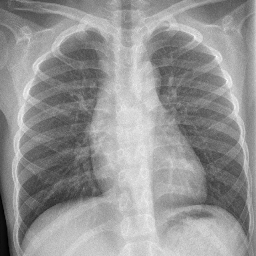

In [13]:
array_to_img(train_generator[3])

In [14]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [15]:
# initializers Glora / Kaiminghe

In [16]:
# regularization rate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeUniform

In [17]:
from tensorflow.keras.metrics import Recall, Precision, Accuracy



In [18]:
model = models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=HeUniform(), input_shape=(256, 256, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=HeUniform()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeUniform()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeUniform()))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_initializer=HeUniform()))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)      

In [19]:
class_weights = dict(zip(np.unique(y_train), 
                         class_weight.compute_class_weight(classes=np.unique(y_train), 
                                                           y=y_train, class_weight='balanced')))

In [20]:
from tensorflow.keras.optimizers import Adam

In [21]:
optimizer = Adam(learning_rate=.00005)

In [22]:
num_epochs = 4

model.compile(loss='binary_crossentropy',  optimizer=optimizer, metrics=['acc', Recall(), Precision()])

history = model.fit(train_generator, epochs=num_epochs, steps_per_epoch=144,
                    class_weight=class_weights, validation_data=val_generator, validation_steps = 18)

Epoch 1/4
144/144 [==============================] - 214s 1s/step - loss: 0.6836 - acc: 0.6932 - recall: 0.7168 - precision: 0.8595 - val_loss: 0.1183 - val_acc: 0.9653 - val_recall: 0.9891 - val_precision: 0.9414
Epoch 2/4
144/144 [==============================] - 207s 1s/step - loss: 0.2285 - acc: 0.9099 - recall: 0.9149 - precision: 0.9648 - val_loss: 0.1263 - val_acc: 0.9497 - val_recall: 0.9928 - val_precision: 0.9103
Epoch 3/4
144/144 [==============================] - 202s 1s/step - loss: 0.1508 - acc: 0.9423 - recall: 0.9474 - precision: 0.9772 - val_loss: 0.0789 - val_acc: 0.9705 - val_recall: 0.9928 - val_precision: 0.9481
Epoch 4/4
144/144 [==============================] - 193s 1s/step - loss: 0.1362 - acc: 0.9472 - recall: 0.9512 - precision: 0.9799 - val_loss: 0.0895 - val_acc: 0.9601 - val_recall: 0.9964 - val_precision: 0.9259


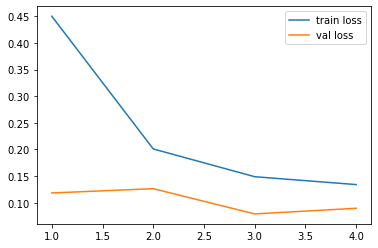

In [32]:
plt.plot(range(1,num_epochs+1), history.history['loss'], label='train loss')
plt.plot(range(1,num_epochs+1), history.history['val_loss'], label= 'val loss')

plt.legend()

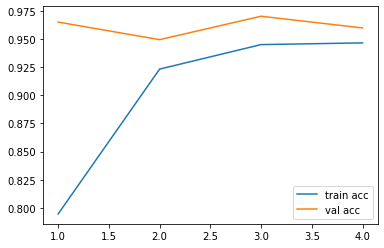

In [33]:
plt.plot(range(1,num_epochs+1), history.history['acc'], label = 'train acc')
plt.plot(range(1,num_epochs+1), history.history['val_acc'], label = 'val acc')


plt.legend()

In [40]:
model.evaluate(test_generator)

20/20 [==============================] - 9s 422ms/step - loss: 0.5929 - acc: 0.8078 - recall: 0.9899 - precision: 0.7680


[0.5928894281387329, 0.807812511920929, 0.9899497628211975, 0.7680311799049377]

In [ ]:
# test_generator.reset()
# y_pred = model.predict(test_generator) > 0.5
# classes = test_generator.classes[test_generator.index_array]


In [34]:
y_true = test_generator.classes
y_pred = model.predict(test_generator) > 0.5

In [35]:
y_pred.squeeze().shape

(640,)

In [36]:
# con_mat = tf.math.confusion_matrix(y_test_full, y_pred).numpy()
# con_mat_df = pd.DataFrame(con_mat, index=['norm', 'pneum'], columns=['norm', 'pneum'])

In [37]:
confusion_matrix(y_true, y_pred)

array([[123, 119],
       [  4, 394]])

In [38]:
len(y_pred)

640

In [ ]:
pca_model = models.Sequential()

pca_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=HeNormal(), input_shape=(256, 256, 1)))
pca_model.add(MaxPooling2D((2, 2)))

pca_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=HeNormal()))
pca_model.add(MaxPooling2D((2, 2)))

pca_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeNormal()))
pca_model.add(MaxPooling2D((2, 2)))

pca_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeNormal()))
pca_model.add(MaxPooling2D((2, 2)))

pca_model.add(Flatten())
pca_model.add(Dropout(0.5))
pca_model.add(Dense(512, activation='relu'))
pca_model.add(Dense(1, activation='sigmoid'))

pca_model.summary()